## Autor: Alejandro Pulido Sánchez

In [1]:
import pynini as pn
from pynini import *

## Funciones

In [2]:
# Devuelve la tabla de simbolos que será legible para nosotros
def tabla_de_simbolos(letras):
    alfabeto = list(letras)
    ts = SymbolTable()
    ts.add_symbol('ϵ', 0)
    for simbolo in alfabeto:
        ts.add_symbol(simbolo, ord(simbolo))
    return ts

# Devuelve una lista con los n caminos con menor coste encontrados en el automata dado.
def n_caminos(n,fst):
    return list(pn.shortestpath(fst, nshortest=n).paths().ostrings())

# Imprime el automata usando la tabla de simbolos dada.
def imprimir(fst, symbol_table):
  fst.set_input_symbols(symbol_table)
  fst.set_output_symbols(symbol_table)
  return fst

## Automata N

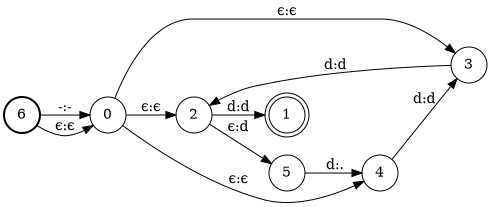

In [3]:
# Definimos el alfabeto que utilizaremos
sym = tabla_de_simbolos('.d-')

# Inicializamos el automata y los estados
N = pn.Fst()
s0 = N.add_state()
s1 = N.add_state()
s2 = N.add_state()
s3 = N.add_state()
s4 = N.add_state()
s5 = N.add_state()
s6 = N.add_state()

# Definimos la relacion entre los estados (arcos) mediante aceptores y transductores.
N.add_arc( s0, pn.Arc( 0, 0, 0, s2) )
N.add_arc( s0, pn.Arc( 0, 0, 0, s3) )
N.add_arc( s0, pn.Arc( 0, 0, 0, s4) )
N.add_arc( s2, pn.Arc( ord('d'), ord('d'), 0, s1) )
N.add_arc( s2, pn.Arc( 0, ord('d'), 0, s5) )
N.add_arc(s3, pn.Arc(ord('d'), ord('d'), 0, s2))
N.add_arc(s4, pn.Arc(ord('d'), ord('d'), 0, s3))
N.add_arc(s5, pn.Arc(ord('d'), ord('.'), 0, s4))
N.add_arc(s6, pn.Arc(ord('-'), ord('-'), 0, s0))
N.add_arc( s6, pn.Arc( 0, 0, 0, s0) )



# Definimos estado final e inicial
N.set_start( s6)
N.set_final( s1)

# Mostramos automata
imprimir(N,sym)

In [4]:
n_caminos(1,"-ddddddd" @ N)

['-d.ddd.ddd']

## Automata R

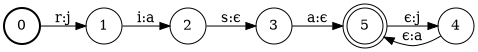

In [5]:
# Definimos el alfabeto
sym = tabla_de_simbolos('risaj')
# Inicializamos el automata y los estados
R = pn.Fst()
s0 = R.add_state()
s1 = R.add_state()
s2 = R.add_state()
s3 = R.add_state()
s4 = R.add_state()
s5 = R.add_state()

# Definimos la relacion entre los estados (arcos) mediante aceptores y transductores.
R.add_arc( s0, Arc( ord('r'), ord('j'), 0, s1) )
R.add_arc( s1, Arc( ord('i'), ord('a'), 0, s2) )
R.add_arc( s2, Arc( ord('s'), 0, 0, s3) )
R.add_arc( s3, Arc( ord('a'), 0, 0, s5) )
R.add_arc( s5, Arc( 0, ord('j'), 0, s4) )
R.add_arc( s4, Arc( 0, ord('a'), 0, s5) )

# Definimos estado final e inicial
R.set_start( s0 )
R.set_final( s5 )

# Mostramos automata
imprimir(R,sym)

In [6]:
# Probamos automata
n_caminos(5,"risa" @ R)

['ja', 'jajajaja', 'jajajajaja', 'jajaja', 'jaja']

## _________________________________________________________
#### Hay otra forma más corta sintacticamente de definir un automata aunque semanticamente algo más compleja.
#### Voy a volver a realizar el mismo automata pero de esta manera.

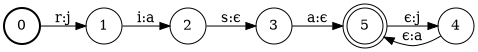

In [7]:
# Definimos alfabeto
sym = tabla_de_simbolos('risaj')

# Definimos automata
# Con el primer pn.cross definimos un transductor entre risa y ja
# Con el segundo pn.cross definimos un transductor entre epsilon y ja
# Para este ultimo cross, añadimos un closure (bucle) para que se añadan 0 o más ja al ya existente
R_short = (pn.cross("risa", "ja") + pn.cross("", "ja").closure()).optimize()

# Imprimimos automata
imprimir(R_short,sym)

In [8]:
# Probamos automata
n_caminos(5,"risa" @ R_short)

['ja', 'jajajaja', 'jajajajaja', 'jajaja', 'jaja']

## Automata C

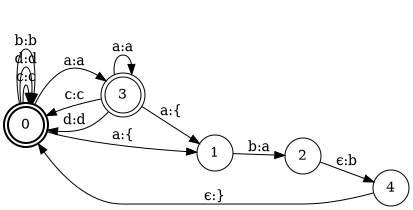

In [9]:
# Definimos alfabeto
sym = tabla_de_simbolos('abcd}{')

# Inicializamos el automata y los estados
C = Fst()
s0 = C.add_state()
s1 = C.add_state()
s2 = C.add_state()
s3 = C.add_state()
s4 = C.add_state()

# Definimos la relacion entre los estados (arcos) mediante aceptores y transductores.
C.add_arc( s0, Arc( ord('a'), ord('a'), 0, s3) )
C.add_arc( s0, Arc( ord('c'), ord('c'), 0, s0) )
C.add_arc( s0, Arc( ord('d'), ord('d'), 0, s0) )
C.add_arc( s0, Arc( ord('b'), ord('b'), 0, s0) )
C.add_arc( s0, Arc( ord('a'), ord('{'), 0, s1) )
C.add_arc( s3, Arc( ord('a'), ord('a'), 0, s3) )
C.add_arc( s3, Arc( ord('c'), ord('c'), 0, s0) )
C.add_arc( s3, Arc( ord('d'), ord('d'), 0, s0) )
C.add_arc( s3, Arc( ord('a'), ord('{'), 0, s1) )
C.add_arc( s1, Arc( ord('b'), ord('a'), 0, s2) )
C.add_arc( s2, Arc( 0, ord('b'), 0, s4) )
C.add_arc( s4, Arc( 0, ord('}'), 0, s0) )

# Definimos estado final e inicial
C.set_start( s0 )
C.set_final( s3 )
C.set_final( s0 )

# Mostramos automata
imprimir(C,sym)

In [10]:
n_caminos(1,"abcdcddaccbaababdc" @ C)

['{ab}cdcddaccba{ab}{ab}dc']

## _________________________________________________________
#### Ya que este automata tiene muchos arcos,vamos a intantar hacerlo de la forma corta vista anteriormente.

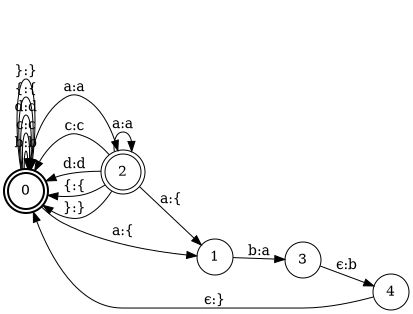

In [11]:
# Defino el alfabeto
sym = tabla_de_simbolos('abcd}{')

# Defino automata
# cdrewrite toma 4 argumentos, el primero un transductor, el segundo y tercero serán los simbolos entre los que actue el transductor. Como en este caso queremos que actue siempre ponemos en ambos epsilon.
# El cuarto argumento será la union de todos los simbolos que encontraremos en el automata
# Como la sustitución se hará siempre encerramos todo el automata en un bucle (closure)
C_short = pn.cdrewrite(pn.cross("ab", "{ab}"), "", "", pn.union(*"abcd}{").closure()).optimize()

# Mostramos automata
imprimir(C_short,sym)

# Hay una diferencia entre C y C_short, este último acepta "}" y "{" en la entrada mientras que en C no.

In [12]:
n_caminos(1,"abcdcddaccbaababdc" @ C_short)

['{ab}cdcddaccba{ab}{ab}dc']

### Info: https://colab.research.google.com/drive/1K6bmCurPR7LhxDKD--L-7P90gafmdFav?usp=sharing#scrollTo=Q5pZ7FPh-Tmc